In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

from custom.watermarks import add_watermark
from custom.preprocessing_dataframe import compute_incidence

### Importa i dati
Leggi tutti i file con estensione `.csv` che sono presenti nella cartella `dati`.

In [2]:
path = '../dati'
extension = 'csv'
os.chdir(path)
file_names = glob.glob('*.{}'.format(extension))

# ometti il primo file, relativo ai dati riassuntivi
file_names = np.sort(file_names[1:])

print(file_names)

['data_iss_età_2021-07-14.csv' 'data_iss_età_2021-07-28.csv'
 'data_iss_età_2021-08-04.csv' 'data_iss_età_2021-08-11.csv'
 'data_iss_età_2021-08-18.csv' 'data_iss_età_2021-08-25.csv'
 'data_iss_età_2021-09-01.csv' 'data_iss_età_2021-09-08.csv'
 'data_iss_età_2021-09-15.csv' 'data_iss_età_2021-09-22.csv'
 'data_iss_età_2021-09-29.csv']


In [3]:
labels = ['14 Lug', '4 Ago', '18 Ago', '1 Set', '15 Set', '29 Set']

### Calcola rapporti tra incidenze

In [4]:
def compute_incidence_ratio(category):
    
    result_list = []
    
    for f_name in file_names:
    
        df_età = pd.read_csv(f_name, sep=';')
        df_tassi = compute_incidence(df_età)

        rapporto_fra_tassi = pd.DataFrame(np.transpose([df_tassi['Casi, non vaccinati']/df_tassi['Casi, vaccinati'],
                              df_tassi['Ospedalizzati, non vaccinati']/df_tassi['Ospedalizzati, vaccinati'],
                              df_tassi['In terapia intensiva, non vaccinati']/df_tassi['In terapia intensiva, vaccinati'],
                              df_tassi['Deceduti, non vaccinati']/df_tassi['Deceduti, vaccinati']]))

        rapporto_fra_tassi.columns = ['Casi', 'Ospedalizzati', 'TI', 'Deceduti']
        rapporto_fra_tassi.index = df_tassi.index
        
        result_list.append(np.array(rapporto_fra_tassi[category]))
    
    result_list = np.array(result_list)
    
    return result_list

### Mostra risultati

In [5]:
ll = len(file_names)

def add_to_plot():
    plt.xticks(np.arange(0, ll, 2), labels)
    plt.ylabel('Rapporto fra incidenze \n(non vaccinati/vaccinati)')
    plt.legend(['12-39', '40-59', '60-79', '80+'])
    plt.ylim(0, 60)
    plt.grid()

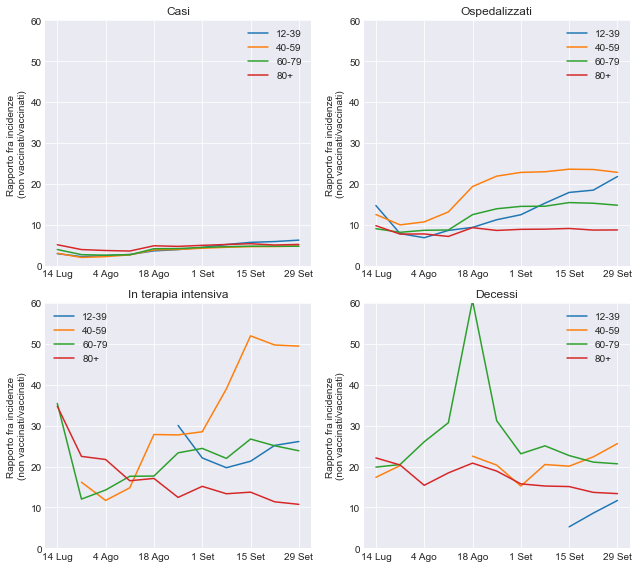

In [6]:
plt.style.use('seaborn-dark')

plt.figure(figsize=(9, 8))
plt.subplot(2, 2, 1)
plt.plot(compute_incidence_ratio('Casi'))
plt.title('Casi')
add_to_plot()
plt.subplot(2, 2, 2)
plt.plot(compute_incidence_ratio('Ospedalizzati'))
plt.title('Ospedalizzati')
add_to_plot()
plt.subplot(2, 2, 3)
plt.plot(compute_incidence_ratio('TI'))
plt.title('In terapia intensiva')
add_to_plot()
plt.subplot(2, 2, 4)
plt.plot(compute_incidence_ratio('Deceduti'))
plt.title('Decessi')
add_to_plot()
plt.tight_layout()
plt.savefig('../risultati/andamento_rapporti_incidenze.png', dpi=300)
plt.show()